# Merging Data

In this section we will learn how to join dataframes and will apply this to creating a choropleth map with `geopandas`.

## About Our Data
Our goal in this lesson will be to join two datasets, one with demographic information and another with country outlines, to create the following choropleth map showing the number of Arctic communities by country and their location in Scandinavia:

__First dataset:__
Natural Earth's medium scale 

__Second dataset:__
* GeoJason file
* attributes/columns
    * name - name of Arctic community
    * population - population of Arctic community, as of 2022
    * country - country that the Arctic community falls within (see dataset metadata for the codes)
    * geoname-id - numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data
    
## Data Preparation
__Countries Data__
1. Import necessary libraries
2. Update df display
3. Read in data
4. Exploratory data analysis
5. Tidy data
    * update column names to lowercase
    * filter to desired columns

In [70]:
# 1 - import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [71]:
# 2 - update display of pandas df, no maximum columns to display
pd.set_option('display.max.columns', None)

In [72]:
# 3 - import country polygons
countries = gpd.read_file('data/countries/ne_50m_admin_0_countries.shp')
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,None,Zimb.,ZW,Republic of Zimbabwe,None,Zimbabwe,None,None,Zimbabwe,None,1,5,3,9,14645468.0,14,2019,21440,2019,5. Emerging region: G20,5. Low income,ZI,ZW,ZW,ZWE,ZWE,716,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,None,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,2.5,8.0,29.925444,-18.911640,1159321441,Q954,زيمبابوي,জিম্বাবুয়ে,Simbabwe,Zimbabwe,Zimbabue,زیمبابوه,Zimbabwe,Ζιμπάμπουε,זימבבואה,ज़िम्बाब्वे,Zimbabwe,Zimbabwe,Zimbabwe,ジンバブエ,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Зімбабве,زمبابوے,Zimbabwe,津巴布韦,辛巴威,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,None,Zambia,ZM,Republic of Zambia,None,Zambia,None,None,Zambia,None,5,8,5,13,17861030.0,14,2019,23309,2019,7. Least developed region,4. Lower middle income,ZA,ZM,ZM,ZMB,ZMB,894,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,None,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,26.395298,-14.660804,1159321439,Q953,زامبيا,জাম্বিয়া,Sambia,Zambia,Zambia,زامبیا,Zambie,Ζάμπια,זמביה,ज़ाम्बिया,Zambia,Zambia,Zambia,ザンビア,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Замбія,زیمبیا,Zambia,赞比亚,尚比亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,None,Yem.,YE,Republic of Yemen,None,Yemen,None,None,"Yemen, Rep.",None,5,3,3,11,29161922.0,15,2019,22581,2019,7. Least developed region,4. Lower middle income,YM,YE,YE,YEM,YEM,887,887,887,RY,YEM,23425

<AxesSubplot:>

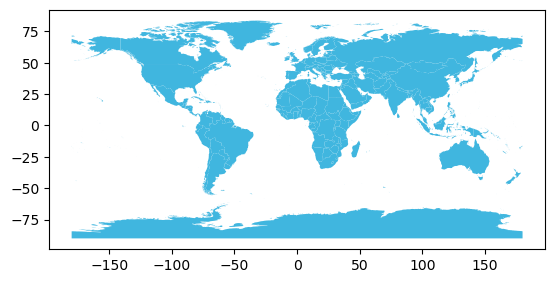

In [73]:
# 4 - view plot of shape files
countries.plot(color = '#40B6DF')

In [74]:
# 5 - change col name casing
countries.columns = countries.columns.str.lower()
countries.columns

# create subset w/desired columns
countries_sub = countries[['admin','type','geometry']]
countries_sub.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


__Arctic Communities Data__
1. Read `geopandas.read_file()` to read directly from URL
2. Compare the CRS of both dfs
    * if they're the same, you can plot them together without changing CRS
3. Create simple plot of combined data


In [75]:
# 1 - read in Arctic community data
url = 'https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4'
communities = gpd.read_file(url)
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [76]:
# 2 - check CRS of both data frames
communities.crs == countries_sub.crs

True

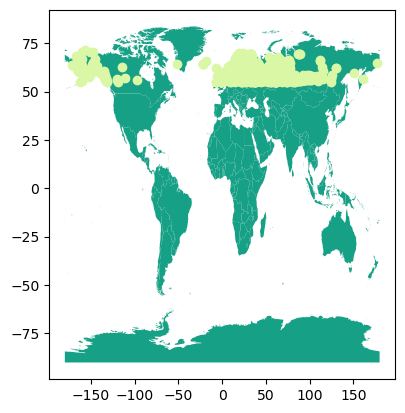

In [77]:
fig, ax = plt.subplots()

countries_sub.plot(ax=ax, color = '#16A085')
communities.plot(ax=ax, color = '#DAF7A6')
plt.show()

__Next__ We want to calculate the number of Arctic communities by country. 

Breakdown:
1. We start with our `communities` df and use `groupby('country')` to group by country code
2. Use `count()` as an aggregator function to count how many rows belong to each country code
3. The result of this operation is a df and we select a single column with the counts by selecting the `name` column
    * run `communities.groupby('country').count() to check` if df
4. The result is a single `pd.Series` in the variable `n_comms`
5. We then convert this `pd.Series` into a `pd.DataFrame` and clean it up a bit

In [78]:
# extract number of communities by country as a pd.Series
n_comms = communities.groupby('country').count().name
n_comms

country
AX      1
BY      8
CA      7
DK     72
EE     14
FI     98
FO      1
GB     96
GL      1
IS      5
LT     26
LV     25
NO     48
RU    774
SE    133
US    115
Name: name, dtype: int64

In [79]:
# convert the pd.Series into a pd.DataFrame and update it
n_comms = pd.DataFrame(n_comms).rename(columns={'name':'n_communities'}).reset_index()

# number of communities per country
n_comms

,country,n_communities
0,AX,1
1,BY,8
2,CA,7
3,DK,72
4,EE,14
5,FI,98
6,FO,1
7,GB,96
8,GL,1
9,IS,5


In [80]:
# select Scandanavia data
scandi_codes = ['DK','NO','SE','FO','FI','IS','AX']

# subset by rows
    #using .isin() to select things in scandi_codes
scandi_n_comms = n_comms[n_comms.country.isin(scandi_codes)].copy()
scandi_n_comms

,country,n_communities
0,AX,1
3,DK,72
5,FI,98
6,FO,1
9,IS,5
12,NO,48
14,SE,133


## Merging Datasets
Merging the geodataframe with outlines of the countries to the df of Arctic communities. In order to merge datasets, there must be at least one common column between datasets.

Check column names using `countries_sub.columns` and `scandi_n_comms.columns`. Since there are no shared columns, we need to add a new column, `admin`, to `scandi_n_comms`:

In [81]:
# Compare column names
print(countries_sub.columns)
print(scandi_n_comms.columns)

Index(['admin', 'type', 'geometry'], dtype='object')
Index(['country', 'n_communities'], dtype='object')


In [82]:
# Add country names 
scandi_names = ['Aland Islands',
                'Denmark',
                'Finland',
                'Faroe Islands',
                'Iceland',
                'Norway',
                'Sweden']

scandi_n_comms['admin'] = scandi_names
scandi_n_comms

,country,n_communities,admin
0,AX,1,Aland Islands
3,DK,72,Denmark
5,FI,98,Finland
6,FO,1,Faroe Islands
9,IS,5,Iceland
12,NO,48,Norway
14,SE,133,Sweden


To merge dataframes we can use the `pandas.merge()` function, which uses the following syntax:

```Python
output_df = pd.merge(left_df,
                    right_df,
                    how = type_of_join_
                    on = col_to_join)
```
* `output_df` is the dataframe resulting from the merge,
* `left_df` is the dataframe we have “on the left side”,
* `right_df` is the dataframe we have “on the right side”
* `how` specifies the type of join between the left and right dataframes,
    * the default is to do an inner join
* `on` specifies the column to join on, this column must be present in both our dataframes.

For this example, we want to complete an _inner join_ which will only keep values between both dataframes:

In [83]:
scandi_countries = pd.merge(countries_sub,
                           scandi_n_comms,
                           how = 'inner',
                           on = 'admin')

scandi_countries

,admin,type,geometry,country,n_communities
0,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
1,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
2,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
3,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
4,Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
5,Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72


Notice that Aland Island is not in the new df. We can verify that Aland Islands is absent from the original countries df:

In [94]:
# check if AI is in the original df
'Aland Islands' in countries.values

False

However, we know Aland Island has an arctic community, so we don't want to exclude it completely. Aland Island is part of Finland, so we'll add an extra community in Finland:

In [95]:
#update Finland row to have an extra community
scandi_countries

,admin,type,geometry,country,n_communities
0,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
1,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
2,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
3,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
4,Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
5,Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72


In [101]:
scandi_countries

,admin,type,geometry,country,n_communities
0,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
1,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
2,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
3,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
4,Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
5,Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72
